In [1]:
import os
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import cv2

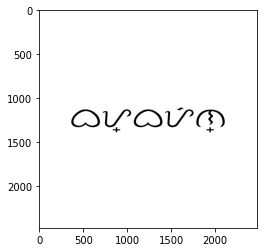

In [3]:
image_file = '../dataset/1d.png'
image_test = cv2.imread(image_file)
plt.imshow(image_test)
plt.show()

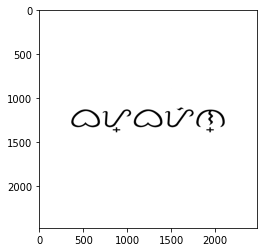

In [4]:
gray = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

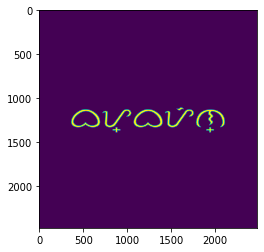

In [5]:
thresh1 = cv2.threshold(gray ,120,255,cv2.THRESH_BINARY_INV)[1]
path = '../dataset'
cv2.imwrite(os.path.join(path , 'binary.jpg'), thresh1)
plt.imshow(thresh1)
plt.show()

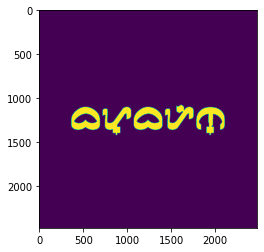

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,60))
dilated = cv2.dilate(thresh1, kernel, iterations=1)
cv2.imwrite(os.path.join(path , 'dilated.jpg'), dilated)
plt.imshow(dilated)
plt.show()

In [7]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [8]:
import imutils
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

In [9]:
for c in cnts:
    if cv2.contourArea(c) > 10:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(image_test, (x, y), (x + w, y + h), (0, 255, 0), 2)

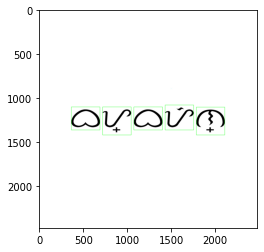

In [10]:
cv2.imwrite(os.path.join(path , 'dilated.jpg'), dilated)
plt.imshow(image_test)
plt.show()